<a href="https://colab.research.google.com/github/lutakrystal305/torch_tutorial/blob/main/PyTorch(Lr_autograd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=040027ff575d582854580e17e1d2dcbf2735afcb2b75b5bc5430bd3553503746
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

In [ ]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad = True)
b = torch.tensor([2.], requires_grad= True)

y_hat = a*x+b
z = y_hat - y
L = z**2

In [ ]:
L.backward()
print(a.grad) # -30
print(b.grad)

tensor([-30.])
tensor([-10.])


In [ ]:
print(x.grad_fn) # None
print(a.grad_fn) # None
print(y_hat.grad_fn) # AddBackward0 
print(z.grad_fn) # SubBackward0 
print(L.grad_fn)

None
None


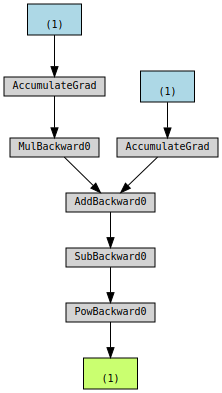

In [ ]:
make_dot(L)

In [ ]:
!git clone https://github.com/nttuan8/Pytorch_tutorial.git

Cloning into 'Pytorch_tutorial'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 38 (delta 8), reused 29 (delta 5), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [ ]:
!mv "/content/Pytorch_tutorial/L2/data_linear.csv" "/content/"

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
data = pd.read_csv('data_linear.csv').values
print(data)

[[  30.      448.524 ]
 [  32.4138  509.248 ]
 [  34.8276  535.104 ]
 [  37.2414  551.432 ]
 [  39.6552  623.418 ]
 [  42.069   625.992 ]
 [  44.4828  655.248 ]
 [  46.8966  701.377 ]
 [  49.3103  748.918 ]
 [  51.7241  757.881 ]
 [  54.1379  831.004 ]
 [  56.5517  855.409 ]
 [  58.9655  866.707 ]
 [  61.3793  902.545 ]
 [  63.7931  952.261 ]
 [  66.2069  995.531 ]
 [  68.6207 1069.78  ]
 [  71.0345 1074.42  ]
 [  73.4483 1103.88  ]
 [  75.8621 1138.69  ]
 [  78.2759 1153.13  ]
 [  80.6897 1240.27  ]
 [  83.1034 1251.9   ]
 [  85.5172 1287.97  ]
 [  87.931  1320.47  ]
 [  90.3448 1374.92  ]
 [  92.7586 1410.16  ]
 [  95.1724 1469.69  ]
 [  97.5862 1478.54  ]
 [ 100.     1515.28  ]]


In [ ]:
x = torch.tensor(data[:, 0])
y = torch.tensor(data[:, 1])

In [ ]:
def model(x, a, b):
    return a*x+b

In [ ]:
def loss_fn(y_hat, y):
    square_diff = (y_hat-y)**2
    print(square_diff.mean())
    print(square_diff)
    return square_diff.mean()

In [ ]:
def training(epochs, lr, params, x, y):
    a, b = params
    #Lưu loss qua epoch để vẽ đồ thị loss
    losses = []
    for epoch in range(1, epochs+1):
        if a.grad is not None:
            a.grad.zero_()
        if b.grad is not None:
            b.grad.zero_()
        
        y_hat = model(x, a, b)
        print('y_hat:', y_hat)
        loss = loss_fn(y_hat, y)

        #Gọi backward để tính đạo hàm ngược của loss với a, b
        loss.backward()
        
        #update a, b  bằng thuật toán gradient descent, để torch.no_grad để khỏi phải gọi lại backward ở bước này
        with torch.no_grad():
            a -= lr * a.grad
            b -= lr * b.grad
        if epoch % 1 == 0:
            losses.append(loss.item())
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return a, b, losses

In [ ]:
a = torch.ones((), requires_grad=True)
b = torch.zeros((), requires_grad=True)
print(a.shape)
a, b, losses = training(30, 0.00005, (a, b), x, y) 

torch.Size([])
y_hat: tensor([ 30.0000,  32.4138,  34.8276,  37.2414,  39.6552,  42.0690,  44.4828,
         46.8966,  49.3103,  51.7241,  54.1379,  56.5517,  58.9655,  61.3793,
         63.7931,  66.2069,  68.6207,  71.0345,  73.4483,  75.8621,  78.2759,
         80.6897,  83.1034,  85.5172,  87.9310,  90.3448,  92.7586,  95.1724,
         97.5862, 100.0000], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(928658.1763, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([ 175162.3386,  227370.8543,  250276.4764,  264391.9731,  340779.0067,
         340966.0699,  373034.1295,  428344.5940,  489450.9339,  498657.5674,
         603520.9373,  638172.9858,  652446.3308,  707559.7349,  789375.2093,
         863643.2828, 1002319.9440, 1006782.4616, 1061789.4884, 1129603.1450,
        1155311.3363, 1344626.4721, 1366085.4922, 1445892.7362, 1519152.3865,
        1650133.4445, 1735546.4487, 1889298.6327, 1907033.3977, 2003017.4784],
       dtype=torch.float64, grad_fn=<PowBackward0>)
Epoch

Text(0, 0.5, 'loss')

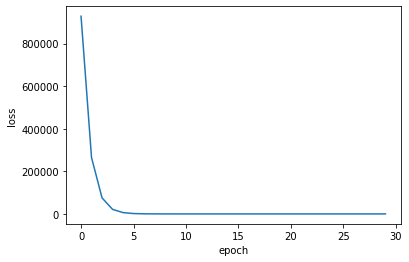

In [ ]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
x = torch.tensor([50])
with torch.no_grad():
    y_hat = model(x, a, b)
    print(y_hat)

tensor([755.6882])


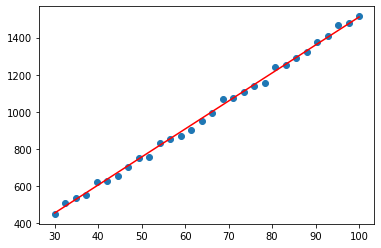

In [ ]:
x = torch.tensor(data[:,0])
y = torch.tensor(data[:,1])
with torch.no_grad():
    y_hat = model(x, a, b)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')